In [75]:
%pylab inline
from __future__ import division
import scipy as sp
from scipy import stats
from scipy.signal import argrelextrema
from scipy.interpolate import interp1d
import operator as op
from decimal import *
import pickle
import mpld3
mpld3.enable_notebook()

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [44]:
%run ../cow.py

# Waterfall Plots

`%matplotlib` prevents importing * from pylab and numpy
/Users/leahdickstein/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:30: RuntimeWarning: divide by zero encountered in log10


Populating the interactive namespace from numpy and matplotlib


/Users/leahdickstein/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:31: RuntimeWarning: divide by zero encountered in log10
/Users/leahdickstein/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:32: RuntimeWarning: divide by zero encountered in log10
/Users/leahdickstein/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:33: RuntimeWarning: divide by zero encountered in log10
/Users/leahdickstein/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:34: RuntimeWarning: divide by zero encountered in log10


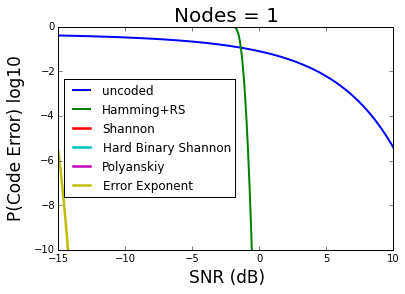

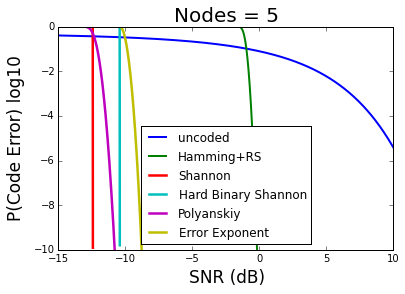

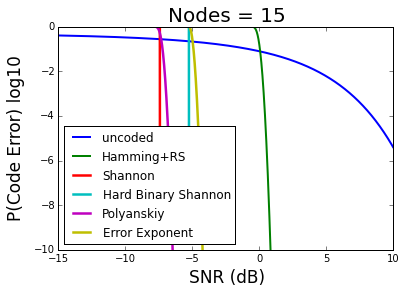

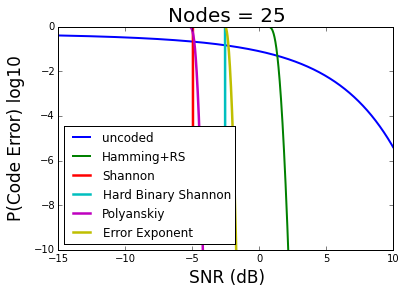

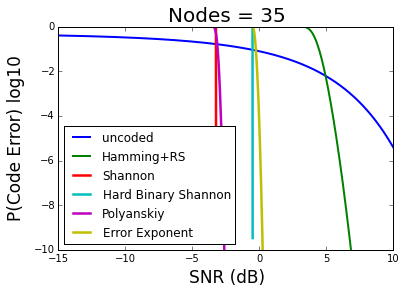

In [72]:
%pylab inline

SNR = arange(-15, 10, 0.01)
uncoded = Q(sqrt(2*10**(SNR/10)))

for N in [1, 5, 15, 25, 35]:
    rate = N*160/10000
    filename = '../data_tables/hs_rs_downlink/n' + str(N) + '.in'
    codetable = load_table(filename)
    func = interp1d(codetable[0], codetable[1], kind='linear', bounds_error=False, fill_value=(1.0, 0.0))

    shannonfile = '../data_tables/shannon_tables/n' + str(N) + '.in' 
    shannontable = load_table(shannonfile)
    shannon = interp1d(shannontable[0], shannontable[1], kind='linear', bounds_error=False, fill_value=(1.0, 0.0))
    
    hardshannonfile = '../data_tables/hard_shannon_tables/n' + str(N) + '.in'
    hardshannontable = load_table(hardshannonfile)
    hardshannon = interp1d(hardshannontable[0], hardshannontable[1], kind='linear', bounds_error=False, fill_value=(1.0, 0.0))
    
    polyfile = '../data_tables/polyanskiy_down/n' + str(N) + '.in'
    polytable = load_table(polyfile)
    polyanskiy = interp1d(polytable[0], polytable[1], kind='linear', bounds_error=False, fill_value=(1.0, 0.0))
    
    expfile = '../data_tables/error_exp/down/n' + str(N) + '.in'
    exptable = load_table(expfile)
    error_exp = interp1d(exptable[0], exptable[1], kind='linear', bounds_error=False, fill_value=(1.0, 0.0))

    figure()
    plot(SNR, log10(uncoded), lw=2.0, label='uncoded')
    plot(SNR, log10(func(SNR)), lw=2.0, label='Hamming+RS')
    plot(SNR, log10(shannon(SNR)), lw=2.5, label='Shannon')
    plot(SNR, log10(hardshannon(SNR)), lw=2.5, label='Hard Binary Shannon')
    plot(SNR, log10(polyanskiy(SNR)), lw=2.5, label='Polyanskiy')
    plot(SNR, log10(error_exp(SNR)), lw=2.5, label='Error Exponent')
    legend(loc=0)
    xlabel('SNR (dB)', fontsize=17)
    ylabel('P(Code Error) log10', fontsize=17, labelpad=10)
    ylim([-10, 0])
    title('Nodes = {0}'.format(N), fontsize=20)

#     savefig('waterfall{0}.pdf'.format(N), bbox='tight')

## Slice of Waterfall

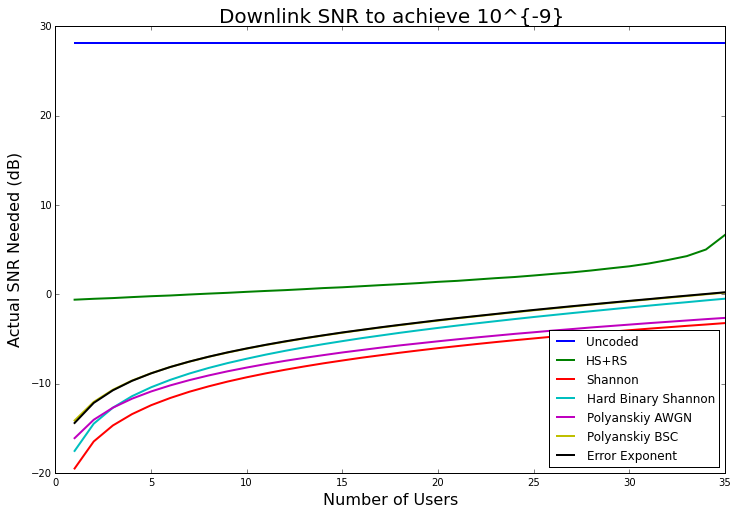

In [89]:
threshold = 10**(-9)

shannonthresh = zeros(35)
hardshannonthresh = zeros(35)
polythresh = zeros(35)
bscthresh = zeros(35)
expthresh = zeros(35)
hsrsthresh = zeros(35)
uncoded = 10*log10((Qinv(threshold)**2)/2) * ones(35)

for N in range(1,36):
#     rate = N*160/10000

    shannonfile = '../data_tables/shannon_tables/n' + str(N) + '.in'
    shannontable = load_table(shannonfile)
    shannonthresh[N-1] = shannontable[0][np.where(np.array(shannontable[1])<=threshold)[0][0]]
    
    hardshannonfile = '../data_tables/hard_shannon_tables/n' + str(N) + '.in'
    hardshannontable = load_table(hardshannonfile)
    hardshannonthresh[N-1] = hardshannontable[0][np.where(np.array(hardshannontable[1])<=threshold)[0][0]]
    
    filename = '../data_tables/hs_rs_downlink/n' + str(N) + '.in'
    hsrstable = load_table(filename)
    hsrsthresh[N-1] = hsrstable[0][np.where(np.array(hsrstable[1])<=threshold)[0][0]]
    
    polyfile = '../data_tables/polyanskiy_down/n' + str(N) + '.in'
    polytable = load_table(polyfile)
    polythresh[N-1] = polytable[0][np.where(np.array(polytable[1])<=threshold)[0][0]]
    
    bscfile = '../data_tables/poly_bsc/down/n' + str(N) + '.in'
    bsctable = load_table(bscfile)
    bscthresh[N-1] = bsctable[0][np.where(np.array(bsctable[1])<=threshold)[0][0]]
    
    expfile = '../data_tables/error_exp/down/n' + str(N) + '.in'
    exptable = load_table(expfile)
    expthresh[N-1] = exptable[0][np.where(np.array(exptable[1])<=threshold)[0][0]]

figure(figsize=(12, 8))
plot(range(1,36), uncoded, lw=2.0, label='Uncoded')
plot(range(1,36), hsrsthresh, lw=2.0, label='HS+RS')
plot(range(1,36), shannonthresh, lw=2.0, label='Shannon')
plot(range(1,36), hardshannonthresh, lw=2.0, label='Hard Binary Shannon')
plot(range(1,36), polythresh, lw=2.0, label='Polyanskiy AWGN')
plot(range(1,36), bscthresh, lw=2.0, label='Polyanskiy BSC')
plot(range(1,36), expthresh, lw=2.0, label='Error Exponent')
xlabel('Number of Users', fontsize=16)
ylabel('Actual SNR Needed (dB)', fontsize=16, labelpad=10)
title('Downlink SNR to achieve 10^{-9}', fontsize=20)
legend(loc=0)
savefig('slice_waterfall_1.pdf', bbox='tight')

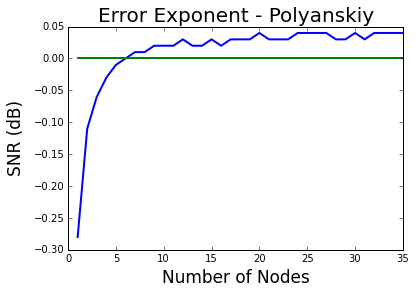

In [90]:
plot(range(1,36), expthresh-bscthresh, lw=2.0)
plot(range(1, 36), zeros(35), lw=2.0)
title('Error Exponent - Polyanskiy', fontsize=20)
xlabel('Number of Nodes', fontsize=17)
ylabel('SNR (dB)', fontsize=17, labelpad=10)
savefig('error_exp_vs_bsc_down.pdf', bbox='tight')

In [79]:
print bscthresh
print expthresh

[ -1.41400000e+01  -1.20600000e+01  -1.07000000e+01  -9.67000000e+00
  -8.85000000e+00  -8.15000000e+00  -7.55000000e+00  -7.01000000e+00
  -6.53000000e+00  -6.09000000e+00  -5.68000000e+00  -5.31000000e+00
  -4.95000000e+00  -4.62000000e+00  -4.31000000e+00  -4.01000000e+00
  -3.73000000e+00  -3.46000000e+00  -3.20000000e+00  -2.95000000e+00
  -2.70000000e+00  -2.47000000e+00  -2.24000000e+00  -2.02000000e+00
  -1.80000000e+00  -1.59000000e+00  -1.38000000e+00  -1.17000000e+00
  -9.70000000e-01  -7.80000000e-01  -5.80000000e-01  -3.90000000e-01
  -2.00000000e-01  -1.00000000e-02   1.80000000e-01]
[-14.42 -12.17 -10.76  -9.7   -8.86  -8.15  -7.54  -7.    -6.51  -6.07
  -5.66  -5.28  -4.93  -4.6   -4.28  -3.99  -3.7   -3.43  -3.17  -2.91
  -2.67  -2.44  -2.21  -1.98  -1.76  -1.55  -1.34  -1.14  -0.94  -0.74
  -0.55  -0.35  -0.16   0.03   0.22]


## Naive Penalty Prediction

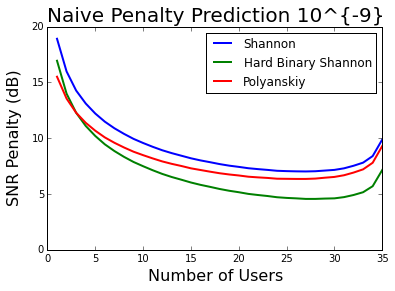

In [31]:
naive_shannon_penalty = hsrsthresh - shannonthresh
naive_hardshannon_penalty = hsrsthresh - hardshannonthresh
naive_polyanskiy_penalty = hsrsthresh - polythresh

plot(range(1,36), naive_shannon_penalty, lw=2.0, label='Shannon')
plot(range(1,36), naive_hardshannon_penalty, lw=2.0, label='Hard Binary Shannon')
plot(range(1,36), naive_polyanskiy_penalty, lw=2.0, label='Polyanskiy')
xlabel('Number of Users', fontsize=16)
ylabel('SNR Penalty (dB)', fontsize=16, labelpad=10)
title('Naive Penalty Prediction 10^{-9}', fontsize=20)
legend(loc=0)
ylim(ymin=0)
savefig('naive_penalty.pdf', bbox='tight')

In [23]:
def polyanskiy_table(rate, blocklength=10000):
    op_SNR = np.arange(-25, 5, 0.01)
    pdrop = []
    for SNR in op_SNR:
        C = np.log2(1 + 10**(SNR/10))
        V = (np.log2(math.e))**2 * (1 - (1 / (1 + 10**(SNR/10)))**2)
        error_prob = Q(sqrt(blocklength/V) * (C - rate))
        pdrop.append(error_prob)
#         error_prob = Q(sqrt(2*10**(SNR/10)))
#         Cprime = C - np.sqrt(V/blocklength) * sqrt(2*10**(SNR/10)) # Qinv(error_prob)
    return [op_SNR, np.array(pdrop)]

In [25]:
op_SNR = arange(-5, 15, 0.01)
num_nodes = arange(1, 36)
for n in num_nodes:
    filename = '../data_tables/polyanskiy_down/n' + str(n) + '.in'
    rate = n*160/10000
    table = polyanskiy_table(rate)
    save_table(table, filename)

In [39]:
op_SNR = arange(-5, 15, 0.01)
num_nodes = arange(1, 36)
for n in num_nodes:
    blocklength = 10000 / n
    filename = '../data_tables/polyanskiy_up/n' + str(n) + '.in'
    rate = n*160/10000
    table = polyanskiy_table(rate, blocklength)
    save_table(table, filename)

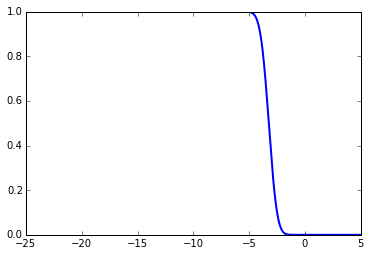

In [41]:
filename = '../data_tables/polyanskiy_up/n' + str(35) + '.in'
codetable = load_table(filename)
plot(codetable[0], codetable[1], lw=2.0)
# print(codetable[1][::100])
# codetable[0][np.where(array(codetable[1])<=padd)[0][0]]

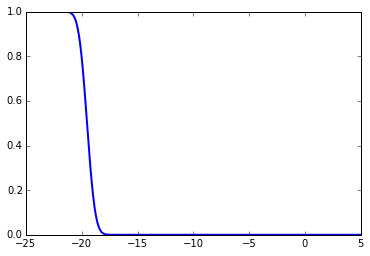

In [24]:
z = polyanskiy_table(160/10000)
plot(z[0], z[1], lw=2.0)

# Loudest Talker

CPU times: user 8.54 s, sys: 306 ms, total: 8.84 s
Wall time: 9.9 s


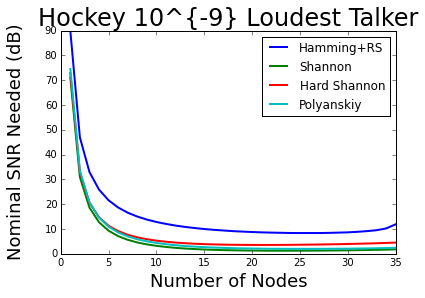

In [32]:
%%time
dSNR = 0.01
target = 10**(-9)
paddratio = 0.1 # padd = 10**(-10)
start_SNR = 0
start_nodes, end_nodes = 1, 36

shannonscheme = '../data_tables/shannon_tables'
hardshannonscheme = '../data_tables/hard_shannon_tables'
hsrsscheme = '../data_tables/hs_rs_downlink'
polyscheme = '../data_tables/polyanskiy_down'

shannon_down = loudest_talker(shannonscheme, dSNR, target, paddratio, start_SNR, start_nodes, end_nodes)
hardshannon_down = loudest_talker(hardshannonscheme, dSNR, target, paddratio, start_SNR, start_nodes, end_nodes)
hsrs_down = loudest_talker(hsrsscheme, dSNR, target, paddratio, start_SNR, start_nodes, end_nodes)
polyanskiy_down = loudest_talker(polyscheme, dSNR, target, paddratio, start_SNR, start_nodes, end_nodes)
 
user_range = range(start_nodes, end_nodes)
plot(user_range, hsrs_down, lw=2.0, label='Hamming+RS')
plot(user_range, shannon_down, lw=2.0, label='Shannon')
plot(user_range, hardshannon_down, lw=2.0, label='Hard Shannon')
plot(user_range, polyanskiy_down, lw=2.0, label='Polyanskiy')
legend(loc=0)
xlabel('Number of Nodes', fontsize=18)
ylabel('Nominal SNR Needed (dB)', fontsize=18, labelpad=20)
title('Hockey 10^{-9} Loudest Talker', fontsize=24)
savefig('hockey_loudest.pdf', bbox='tight')

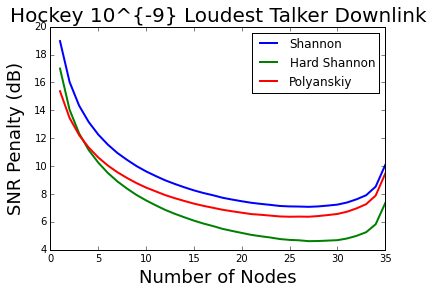

In [33]:
shannon_penalty = hsrs_down - shannon_down
hard_penalty = hsrs_down - hardshannon_down
polyanskiy_penalty = hsrs_down - polyanskiy_down

user_range = range(start_nodes, end_nodes)
plot(user_range, shannon_penalty, lw=2.0, label='Shannon')
plot(user_range, hard_penalty, lw=2.0, label='Hard Shannon')
plot(user_range, polyanskiy_penalty, lw=2.0, label='Polyanskiy')
legend(loc=0)
xlabel('Number of Nodes', fontsize=18)
ylabel('SNR Penalty (dB)', fontsize=18, labelpad=10)
title('Hockey 10^{-9} Loudest Talker Downlink', fontsize=20)
savefig('penalty_loudest_down.pdf', bbox='tight')

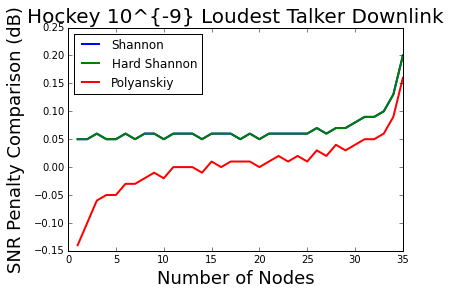

In [38]:
# Naive Penalty vs Actual Penalty

user_range = range(start_nodes, end_nodes)
plot(user_range, shannon_penalty-naive_shannon_penalty, lw=2.0, label='Shannon')
plot(user_range, hard_penalty-naive_hardshannon_penalty, lw=2.0, label='Hard Shannon')
plot(user_range, polyanskiy_penalty-naive_polyanskiy_penalty, lw=2.0, label='Polyanskiy')
legend(loc=0)
xlabel('Number of Nodes', fontsize=18)
ylabel('SNR Penalty Comparison (dB)', fontsize=18, labelpad=10)
title('Hockey 10^{-9} Loudest Talker Downlink', fontsize=20)
savefig('penalty_comparison.pdf', bbox='tight')

In [35]:
print(shannon_penalty-naive_shannon_penalty)

[ 0.05  0.05  0.06  0.05  0.05  0.06  0.05  0.06  0.06  0.05  0.06  0.06
  0.06  0.05  0.06  0.06  0.06  0.05  0.06  0.05  0.06  0.06  0.06  0.06
  0.06  0.07  0.06  0.07  0.07  0.08  0.09  0.09  0.1   0.13  0.2 ]


In [36]:
print(hard_penalty-naive_hardshannon_penalty)

[ 0.05  0.05  0.06  0.05  0.05  0.06  0.05  0.06  0.06  0.05  0.06  0.06
  0.06  0.05  0.06  0.06  0.06  0.05  0.06  0.05  0.06  0.06  0.06  0.06
  0.06  0.07  0.06  0.07  0.07  0.08  0.09  0.09  0.1   0.13  0.2 ]


In [37]:
print(polyanskiy_penalty-naive_polyanskiy_penalty)

[ -1.40000000e-01  -1.00000000e-01  -6.00000000e-02  -5.00000000e-02
  -5.00000000e-02  -3.00000000e-02  -3.00000000e-02  -2.00000000e-02
  -1.00000000e-02  -2.00000000e-02   2.62545541e-12   2.68940425e-12
   2.74802403e-12  -1.00000000e-02   1.00000000e-02   2.90434343e-12
   1.00000000e-02   1.00000000e-02   1.00000000e-02   3.07842640e-12
   1.00000000e-02   2.00000000e-02   1.00000000e-02   2.00000000e-02
   1.00000000e-02   3.00000000e-02   2.00000000e-02   4.00000000e-02
   3.00000000e-02   4.00000000e-02   5.00000000e-02   5.00000000e-02
   6.00000000e-02   9.00000000e-02   1.60000000e-01]


This penalty is probably a result of the discretization error (we use a search in a lookup table to find the naive penalty prediction from the waterfall plots). This implies that the SNR penalty from our hockey plots is **100% explained by** the waterfall plots / the error correcting code, and our protocol gains us nothing / is doing no optimization.

In the case of Polyanskiy, however, our penalty is less than the naive prediction. This implies that we're actually doing better, by a puny amount! Yay!

# Uplink Waterfalls

/Users/leahdickstein/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:28: RuntimeWarning: divide by zero encountered in log10
/Users/leahdickstein/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:29: RuntimeWarning: divide by zero encountered in log10
/Users/leahdickstein/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:30: RuntimeWarning: divide by zero encountered in log10
/Users/leahdickstein/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:31: RuntimeWarning: divide by zero encountered in log10
/Users/leahdickstein/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:32: RuntimeWarning: divide by zero encountered in log10


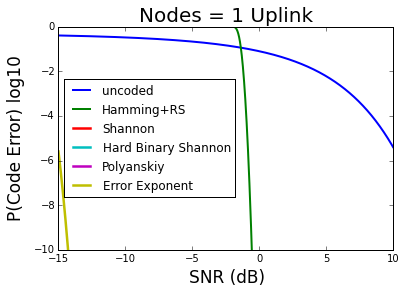

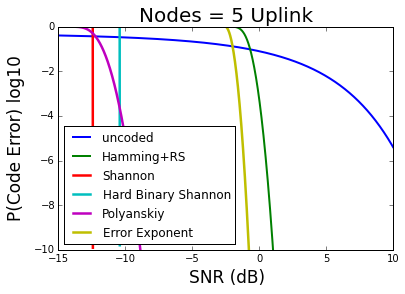

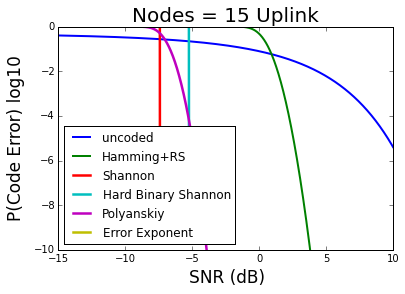

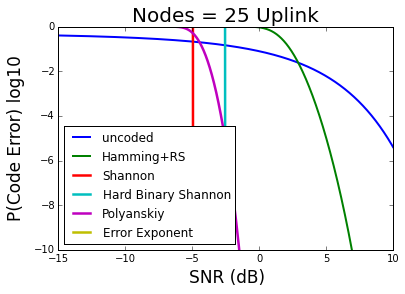

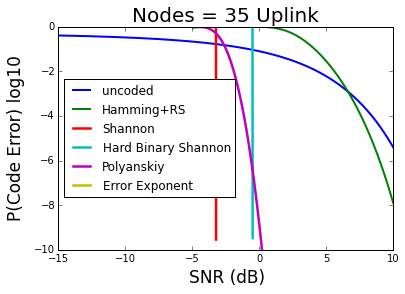

In [99]:
SNR = arange(-15, 10, 0.01)
uncoded = Q(sqrt(2*10**(SNR/10)))

for N in [1, 5, 15, 25, 35]:
    rate = N*160/10000
    filename = '../data_tables/hs_rs_uplink/n' + str(N) + '.in'
    codetable = load_table(filename)
    func = interp1d(codetable[0], codetable[1], kind='linear', bounds_error=False, fill_value=(1.0, 0.0))

    shannonfile = '../data_tables/shannon_tables/n' + str(N) + '.in' 
    shannontable = load_table(shannonfile)
    shannon = interp1d(shannontable[0], shannontable[1], kind='linear', bounds_error=False, fill_value=(1.0, 0.0))
    
    hardshannonfile = '../data_tables/hard_shannon_tables/n' + str(N) + '.in'
    hardshannontable = load_table(hardshannonfile)
    hardshannon = interp1d(hardshannontable[0], hardshannontable[1], kind='linear', bounds_error=False, fill_value=(1.0, 0.0))
    
    polyfile = '../data_tables/polyanskiy_up/n' + str(N) + '.in'
    polytable = load_table(polyfile)
    polyanskiy = interp1d(polytable[0], polytable[1], kind='linear', bounds_error=False, fill_value=(1.0, 0.0))
    
    expfile = '../data_tables/error_exp/up/n' + str(N) + '.in'
    exptable = load_table(expfile)
    error_exp = interp1d(exptable[0], exptable[1], kind='linear', bounds_error=False, fill_value=(1.0, 0.0))

    figure()
    plot(SNR, log10(uncoded), lw=2.0, label='uncoded')
    plot(SNR, log10(func(SNR)), lw=2.0, label='Hamming+RS')
    plot(SNR, log10(shannon(SNR)), lw=2.5, label='Shannon')
    plot(SNR, log10(hardshannon(SNR)), lw=2.5, label='Hard Binary Shannon')
    plot(SNR, log10(polyanskiy(SNR)), lw=2.5, label='Polyanskiy')
    plot(SNR, log10(error_exp(SNR)), lw=2.5, label='Error Exponent')
    legend(loc=0)
    xlabel('SNR (dB)', fontsize=17)
    ylabel('P(Code Error) log10', fontsize=17, labelpad=10)
    ylim([-10, 0])
    title('Nodes = {0} Uplink'.format(N), fontsize=20)

    savefig('waterfall{0}_uplink.pdf'.format(N), bbox='tight')

# Uplink Slice of Waterfall

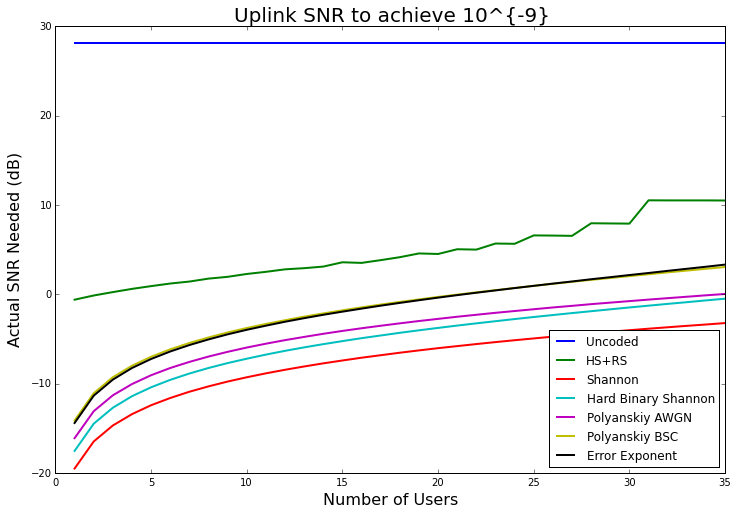

In [146]:
threshold = 10**(-9)

shannonthresh = zeros(35)
hardshannonthresh = zeros(35)
uppolythresh = zeros(35)
uphsrsthresh = zeros(35)
upbscthresh = zeros(35)
upexpthresh = zeros(35)
uncoded = 10*log10((Qinv(threshold)**2)/2) * ones(35)

for N in range(1,36):
#     rate = N*160/10000

    shannonfile = '../data_tables/shannon_tables/n' + str(N) + '.in'
    shannontable = load_table(shannonfile)
    shannonthresh[N-1] = shannontable[0][np.where(np.array(shannontable[1])<=threshold)[0][0]]
    
    hardshannonfile = '../data_tables/hard_shannon_tables/n' + str(N) + '.in'
    hardshannontable = load_table(hardshannonfile)
    hardshannonthresh[N-1] = hardshannontable[0][np.where(np.array(hardshannontable[1])<=threshold)[0][0]]
    
    filename = '../data_tables/hs_rs_uplink/n' + str(N) + '.in'
    hsrstable = load_table(filename)
    uphsrsthresh[N-1] = hsrstable[0][np.where(np.array(hsrstable[1])<=threshold)[0][0]]
    
    polyfile = '../data_tables/polyanskiy_up/n' + str(N) + '.in'
    polytable = load_table(polyfile)
    uppolythresh[N-1] = polytable[0][np.where(np.array(polytable[1])<=threshold)[0][0]]
    
    bscfile = '../data_tables/poly_bsc/up/n' + str(N) + '.in'
    bsctable = load_table(bscfile)
    upbscthresh[N-1] = bsctable[0][np.where(np.array(bsctable[1])<=threshold)[0][0]]
    
    expfile = '../data_tables/error_exp/up/n' + str(N) + '.in'
    exptable = load_table(expfile)
    upexpthresh[N-1] = exptable[0][np.where(np.array(exptable[1])<=threshold)[0][0]]

figure(figsize=(12, 8))
plot(range(1,36), uncoded, lw=2.0, label='Uncoded')
plot(range(1,36), uphsrsthresh, lw=2.0, label='HS+RS')
plot(range(1,36), shannonthresh, lw=2.0, label='Shannon')
plot(range(1,36), hardshannonthresh, lw=2.0, label='Hard Binary Shannon')
plot(range(1,36), uppolythresh, lw=2.0, label='Polyanskiy AWGN')
plot(range(1, 36), upbscthresh, lw=2.0, label='Polyanskiy BSC')
plot(range(1, 36), upexpthresh, lw=2.0, label='Error Exponent')
xlabel('Number of Users', fontsize=16)
ylabel('Actual SNR Needed (dB)', fontsize=16, labelpad=10)
title('Uplink SNR to achieve 10^{-9}', fontsize=20)
legend(loc=0)
savefig('slice_waterfall_uplink_1.pdf', bbox='tight')

In [148]:
print(upexpthresh)
print(upbscthresh)

[-14.42 -11.36  -9.56  -8.26  -7.25  -6.41  -5.69  -5.06  -4.49  -3.98
  -3.52  -3.08  -2.68  -2.3   -1.95  -1.61  -1.28  -0.97  -0.67  -0.38
  -0.1    0.17   0.43   0.69   0.94   1.19   1.43   1.68   1.91   2.15
   2.38   2.62   2.85   3.08   3.32]
[-14.14 -11.09  -9.29  -8.01  -7.    -6.17  -5.46  -4.84  -4.28  -3.78
  -3.33  -2.91  -2.51  -2.15  -1.8   -1.47  -1.16  -0.86  -0.58  -0.3
  -0.04   0.21   0.46   0.7    0.94   1.17   1.39   1.61   1.82   2.03
   2.24   2.45   2.65   2.85   3.05]


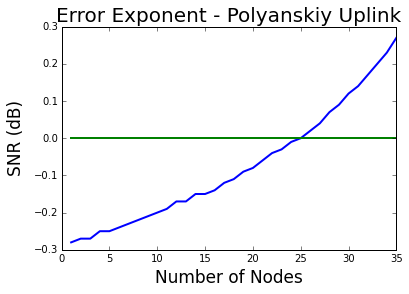

In [149]:
plot(range(1,36), upexpthresh-upbscthresh, lw=2.0)
plot(range(1, 36), zeros(35), lw=2.0)
title('Error Exponent - Polyanskiy Uplink', fontsize=20)
xlabel('Number of Nodes', fontsize=17)
ylabel('SNR (dB)', fontsize=17, labelpad=10)
savefig('error_exp_vs_bsc_up.pdf', bbox='tight')

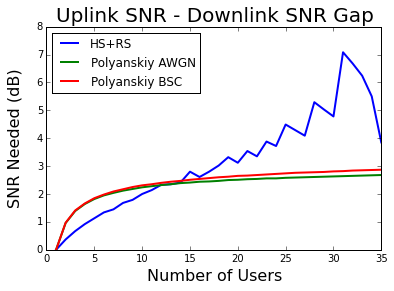

In [7]:
plot(range(1,36), uphsrsthresh - hsrsthresh, lw=2.0, label='HS+RS')
plot(range(1, 36), uppolythresh - polythresh, lw=2.0, label='Polyanskiy AWGN')
plot(range(1, 36), upbscthresh - bscthresh, lw=2.0, label='Polyanskiy BSC')
# plot(arange(1, 36, 1), 0.16381232*arange(1, 36, 1)+0.19594958, lw=2.0) # linear best fit
legend(loc=0)
ylabel('SNR Needed (dB)', fontsize=16, labelpad=15)
xlabel('Number of Users', fontsize=16)
title('Uplink SNR - Downlink SNR Gap', fontsize=20)
savefig('blocklength_penalty.pdf', bbox='tight')

In [22]:
print uppolythresh
print polythresh
print uphsrsthresh - hsrsthresh
print upbscthresh - bscthresh

[-16.12 -13.1  -11.32 -10.06  -9.07  -8.26  -7.58  -6.98  -6.45  -5.97
  -5.54  -5.14  -4.78  -4.43  -4.11  -3.81  -3.53  -3.26  -3.    -2.76
  -2.52  -2.3   -2.08  -1.88  -1.68  -1.48  -1.3   -1.11  -0.94  -0.77
  -0.6   -0.44  -0.28  -0.12   0.03]
[-16.12 -14.06 -12.71 -11.7  -10.89 -10.21  -9.62  -9.1   -8.63  -8.21
  -7.82  -7.46  -7.13  -6.82  -6.52  -6.25  -5.98  -5.73  -5.5   -5.27
  -5.05  -4.84  -4.64  -4.44  -4.26  -4.07  -3.9   -3.72  -3.56  -3.4
  -3.24  -3.09  -2.94  -2.79  -2.65]
[ 0.    0.37  0.67  0.92  1.13  1.34  1.45  1.68  1.79  2.    2.14  2.33
  2.35  2.41  2.8   2.61  2.8   3.02  3.32  3.12  3.54  3.35  3.88  3.72
  4.49  4.29  4.09  5.29  5.03  4.78  7.08  6.68  6.24  5.5   3.85]
[ 0.    0.97  1.41  1.66  1.85  1.98  2.09  2.17  2.25  2.31  2.35  2.4
  2.44  2.47  2.51  2.54  2.57  2.6   2.62  2.65  2.66  2.68  2.7   2.72
  2.74  2.76  2.77  2.78  2.79  2.81  2.82  2.84  2.85  2.86  2.87]


In [33]:
z = polyfit(range(1, 36), uphsrsthresh - hsrsthresh, 2)
print(z)

[-0.00021002  0.17137287  0.1493262 ]


# Naive Penalty Prediction Uplink

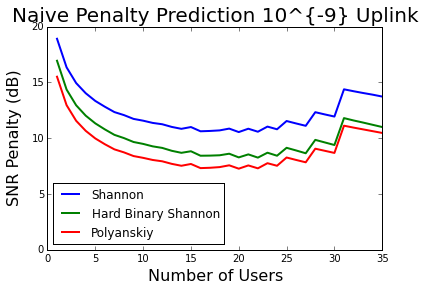

In [46]:
naive_shannon_penalty = hsrsthresh - shannonthresh
naive_hardshannon_penalty = hsrsthresh - hardshannonthresh
naive_polyanskiy_penalty = hsrsthresh - polythresh

plot(range(1,36), naive_shannon_penalty, lw=2.0, label='Shannon')
plot(range(1,36), naive_hardshannon_penalty, lw=2.0, label='Hard Binary Shannon')
plot(range(1,36), naive_polyanskiy_penalty, lw=2.0, label='Polyanskiy')
xlabel('Number of Users', fontsize=16)
ylabel('SNR Penalty (dB)', fontsize=16, labelpad=10)
title('Naive Penalty Prediction 10^{-9} Uplink', fontsize=20)
legend(loc=0)
ylim(ymin=0)
savefig('naive_penalty_uplink.pdf', bbox='tight')

# Uplink Hockey

CPU times: user 9.62 s, sys: 207 ms, total: 9.83 s
Wall time: 10.5 s


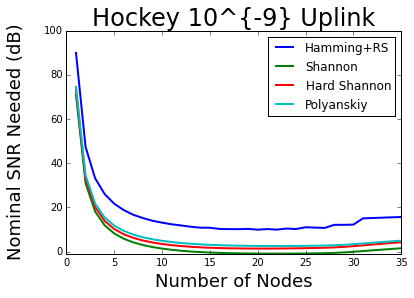

In [51]:
%%time
dSNR = 0.01
target = 10**(-9)
paddratio = 0.1 # padd = 10**(-10)
start_SNR = -1
start_nodes, end_nodes = 1, 36

shannonscheme = '../data_tables/shannon_tables'
hardshannonscheme = '../data_tables/hard_shannon_tables'
hsrsscheme = '../data_tables/hs_rs_uplink'
polyscheme = '../data_tables/polyanskiy_up'

shannon_up = uplink(shannonscheme, dSNR, target, paddratio, start_SNR, start_nodes, end_nodes)
hardshannon_up = uplink(hardshannonscheme, dSNR, target, paddratio, start_SNR, start_nodes, end_nodes)
hsrs_up = uplink(hsrsscheme, dSNR, target, paddratio, start_SNR, start_nodes, end_nodes)
polyanskiy_up = uplink(polyscheme, dSNR, target, paddratio, start_SNR, start_nodes, end_nodes)

user_range = range(start_nodes, end_nodes)
plot(user_range, hsrs_up, lw=2.0, label='Hamming+RS')
plot(user_range, shannon_up, lw=2.0, label='Shannon')
plot(user_range, hardshannon_up, lw=2.0, label='Hard Shannon')
plot(user_range, polyanskiy_up, lw=2.0, label='Polyanskiy')
legend(loc=0)
ylim(ymin=start_SNR)
xlabel('Number of Nodes', fontsize=18)
ylabel('Nominal SNR Needed (dB)', fontsize=18, labelpad=20)
title('Hockey 10^{-9} Uplink', fontsize=24)
savefig('hockey_uplink.pdf', bbox='tight')

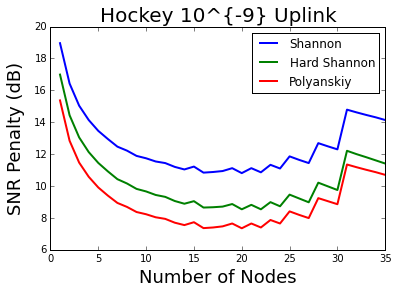

In [52]:
shannon_penalty = hsrs_up - shannon_up
hard_penalty = hsrs_up - hardshannon_up
polyanskiy_penalty = hsrs_up - polyanskiy_up

user_range = range(start_nodes, end_nodes)
plot(user_range, shannon_penalty, lw=2.0, label='Shannon')
plot(user_range, hard_penalty, lw=2.0, label='Hard Shannon')
plot(user_range, polyanskiy_penalty, lw=2.0, label='Polyanskiy')
legend(loc=0)
xlabel('Number of Nodes', fontsize=18)
ylabel('SNR Penalty (dB)', fontsize=18, labelpad=10)
title('Hockey 10^{-9} Uplink', fontsize=20)
savefig('penalty_uplink.pdf', bbox='tight')

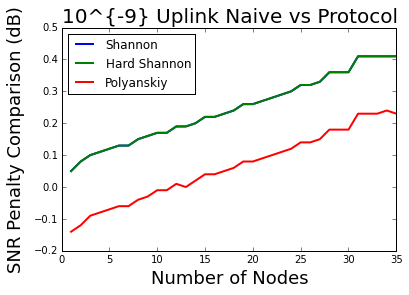

In [57]:
# Naive Penalty vs Actual Penalty

user_range = range(start_nodes, end_nodes)
plot(user_range, shannon_penalty-naive_shannon_penalty, lw=2.0, label='Shannon')
plot(user_range, hard_penalty-naive_hardshannon_penalty, lw=2.0, label='Hard Shannon')
plot(user_range, polyanskiy_penalty-naive_polyanskiy_penalty, lw=2.0, label='Polyanskiy')
legend(loc=0)
xlabel('Number of Nodes', fontsize=18)
ylabel('SNR Penalty Comparison (dB)', fontsize=18, labelpad=10)
title('10^{-9} Uplink Naive vs Protocol', fontsize=20)
savefig('penalty_comparison_uplink.pdf', bbox='tight')

# Polyanskiy for BSC

In [7]:
def polyanskiy_bsc_table(rate, blocklength=10000):
    op_SNR = np.arange(-25, 5, 0.01)
    pdrop = []
    for SNR in op_SNR:
        d = Q(np.sqrt(2*10**(SNR/10))) # real or complex channel?
        C = 1 + d*np.log2(d) + (1-d)*np.log2(1-d)
        V = d * (1 - d) * np.log2((1-d)/d)**2
        error_prob = Q(sqrt(blocklength/V) * (C - rate))
        pdrop.append(error_prob)
    return [op_SNR, np.array(pdrop)]

In [8]:
op_SNR = arange(-5, 15, 0.01)
num_nodes = arange(1, 36)
for n in num_nodes:
    filename = '../data_tables/poly_bsc/down/n' + str(n) + '.in'
    rate = n*160/10000
    table = polyanskiy_bsc_table(rate)
    save_table(table, filename)

In [10]:
op_SNR = arange(-5, 15, 0.01)
num_nodes = arange(1, 36)
for n in num_nodes:
    blocklength = 10000 / n
    filename = '../data_tables/poly_bsc/up/n' + str(n) + '.in'
    rate = n*160/10000
    table = polyanskiy_bsc_table(rate, blocklength)
    save_table(table, filename)

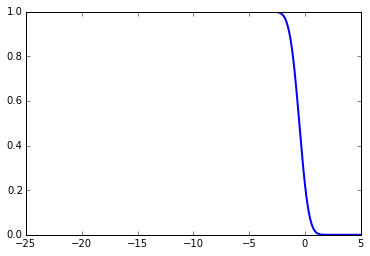

In [18]:
filename = '../data_tables/poly_bsc/up/n' + str(35) + '.in'
codetable = load_table(filename)
plot(codetable[0], codetable[1], lw=2.0)
# print(codetable[1][::100])
# codetable[0][np.where(array(codetable[1])<=padd)[0][0]]

# Error Exponent

In [127]:
def entropy(p):
    return -(p*log2(p) + (1-p)*log2(1-p))

def divergence(p, q):
    return p*np.log2(p/q) + (1-p)*np.log2((1-p)/(1-q))

# def deltacrit(q):
# #     deltar = arange(0, 0.5, 10**(-2))
#     rates = divergence(deltar, q)
#     rates[0] = 1
#     rateToDelta = interp1d(rates, deltar, kind='linear', bounds_error=False, fill_value=(1.0, 0.0))
#     return rateToDelta(rate)

In [144]:
def error_exp_table(rate, rateToDelta, blocklength=10000):
    deltacrit = rateToDelta(rate)
    op_SNR = np.arange(-16, 5, 0.01)
    theoretical_bitdrop = Q(np.sqrt(2*10**(op_SNR/10)))
    theoretical_bitdrop[np.where(theoretical_bitdrop > deltacrit)] = deltacrit

    esp = divergence(deltacrit, theoretical_bitdrop)
    perrors = 2**(-blocklength*esp)
    
    return [op_SNR, perrors]

In [145]:
%%time

# Solve GV Distance
deltar = arange(0, 0.5, 10**(-8))
rates = 1 - entropy(deltar)
rates[0] = 1
rateToDelta = interp1d(rates, deltar, kind='linear', bounds_error=False, fill_value=(0.5, 0.0))

num_nodes = arange(1, 36, 1)
for N in num_nodes:
    blocklength = 10000/N
    filename = '../data_tables/error_exp/up/n' + str(N) + '.in'
    rate = N*160/10000
    table = error_exp_table(rate, rateToDelta, blocklength)
    save_table(table, filename)

/Users/leahdickstein/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in log2
  from ipykernel import kernelapp as app
/Users/leahdickstein/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in multiply
  from ipykernel import kernelapp as app


CPU times: user 7.23 s, sys: 6.73 s, total: 14 s
Wall time: 19.6 s


3.05


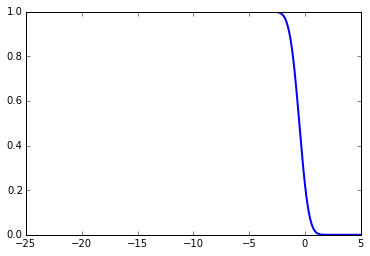

In [137]:
N = 35
filename = '../data_tables/poly_bsc/up/n' + str(N) + '.in'
table = load_table(filename)
plot(table[0], table[1], lw=2.0)
print(table[0][np.where(table[1] <= 10**(-9))][0])

3.32


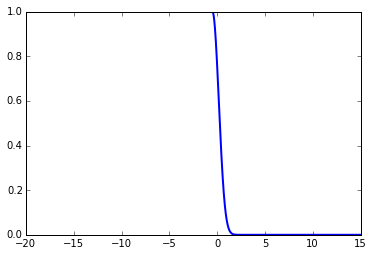

In [136]:
N = 35
filename = '../data_tables/error_exp/up/n' + str(N) + '.in'
table = load_table(filename)
plot(table[0], table[1], lw=2.0)
print(table[0][np.where(table[1] <= 10**(-9))][0])

0.56


/Users/leahdickstein/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in log2
  from ipykernel import kernelapp as app
/Users/leahdickstein/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in multiply
  from ipykernel import kernelapp as app


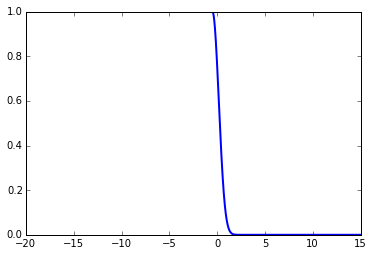

In [133]:
deltar = arange(0, 0.5, 10**(-6))
rates = 1 - entropy(deltar)
rates[0] = 1
rateToDelta = interp1d(rates, deltar, kind='linear', bounds_error=False, fill_value=(0.5, 0.0))

# num_nodes = arange(1, 36, 1)
N = 35
blocklength = 10000/N
rate = N*160/10000
print(rate)
table = error_exp_table(rate, rateToDelta, blocklength)
plot(table[0], table[1], lw=2.0)

Populating the interactive namespace from numpy and matplotlib
[ nan  nan  nan ...,  nan  nan  nan]


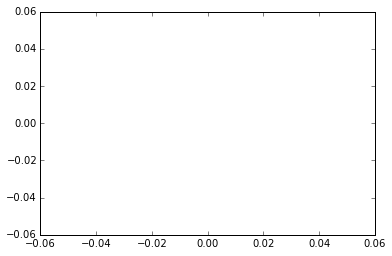

In [120]:
%pylab inline

filename = '../data_tables/error_exp/up/n' + str(8) + '.in'
table1 = load_table(filename)
plot(table1[0], table1[1], lw=2.0)
print(table1[1])

<type 'numpy.ndarray'>


/Users/leahdickstein/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in log2
  from ipykernel import kernelapp as app
/Users/leahdickstein/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in multiply
  from ipykernel import kernelapp as app


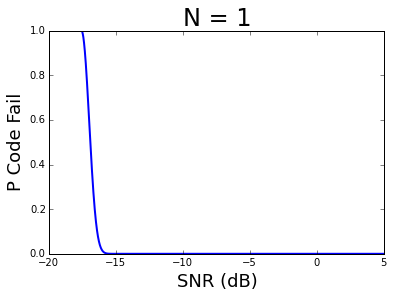

In [60]:
N = 1
blocklength = 10000
rate = 160*N/blocklength

# Solve GV Distance
deltar = arange(0, 0.5, 10**(-2))
rates = 1 - entropy(deltar)
rates[0] = 1
rateToDelta = interp1d(rates, deltar, kind='linear', bounds_error=False, fill_value=(0.5, 0.0))
deltacrit = rateToDelta(rate)

# Sweep over SNR
op_SNR = arange(-20, 5, 0.01)
theoretical_bitdrop = Q(np.sqrt(2*10**(op_SNR/10)))
theoretical_bitdrop[np.where(theoretical_bitdrop > deltacrit)] = deltacrit

esp = divergence(deltacrit, theoretical_bitdrop)
perrors = 2**(-blocklength*esp)

plot(op_SNR, perrors, lw=2.0)
title('N = {0}'.format(N), fontsize=24)
xlabel('SNR (dB)', fontsize=18)
ylabel('P Code Fail', fontsize=18)

[  3.97409925e-05   2.41626442e-05   1.23275480e-05   4.36973596e-06
   4.26876354e-07   6.40363450e-07   5.15540895e-06   1.41211358e-05
   2.76906741e-05   4.60212593e-05   6.92743327e-05   9.76156443e-05
   1.31215358e-04   1.70248158e-04   2.14893363e-04   2.65335032e-04
   3.21762088e-04   3.84368428e-04   4.53353048e-04   5.28920168e-04
   6.11279354e-04   7.00645650e-04   7.97239708e-04   9.01287928e-04
   1.01302259e-03   1.13268200e-03   1.26051064e-03   1.39675929e-03
   1.54168522e-03   1.69555232e-03   1.85863126e-03   2.03119964e-03
   2.21354219e-03   2.40595092e-03   2.60872527e-03   2.82217235e-03
   3.04660703e-03   3.28235223e-03   3.52973902e-03   3.78910687e-03
   4.06080381e-03   4.34518667e-03   4.64262126e-03   4.95348259e-03
   5.27815509e-03   5.61703282e-03   5.97051973e-03   6.33902983e-03
   6.72298749e-03   7.12282764e-03   7.53899604e-03   7.97194953e-03
   8.42215625e-03   8.89009598e-03   9.37626033e-03   9.88115308e-03
   1.04052904e-02   1.09492012e-02

/Users/leahdickstein/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: RuntimeWarning: divide by zero encountered in log2
/Users/leahdickstein/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: RuntimeWarning: invalid value encountered in multiply


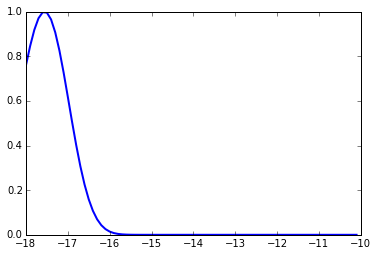

In [42]:
N = 1
blocklength = 10000
rate = 160*N/blocklength

deltar = arange(0, 0.5, 10**(-3))
rates = divergence(deltar, 0.5)
rateToDelta = interp1d(rates, deltar, kind='linear', bounds_error=True)
deltacrit = rateToDelta(rate)

# op_SNR = np.arange(-15, 10, 0.1)
op_SNR = np.arange(-18, -10, 0.1)
theoretical_bitdrop = Q(np.sqrt(2*10**(op_SNR/10)))
perrors = 2**(-blocklength*divergence(deltacrit, theoretical_bitdrop))
plot(op_SNR, perrors, lw=2.0)
# print(perrors)
print divergence(deltacrit, theoretical_bitdrop)

Populating the interactive namespace from numpy and matplotlib
0.0339456550041
6.50723083564e-103


`%matplotlib` prevents importing * from pylab and numpy
/Users/leahdickstein/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: RuntimeWarning: divide by zero encountered in log2
/Users/leahdickstein/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: RuntimeWarning: invalid value encountered in multiply


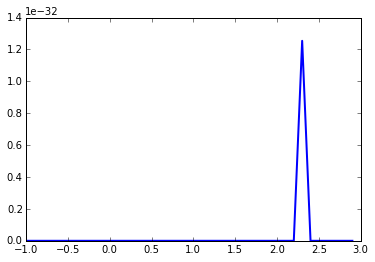

In [34]:
%pylab inline

N = 1
rate = 160*N/10000

deltar = arange(0, 0.5, 10**(-3))
op_SNR = np.arange(-1, 3, 0.1)
theoretical_bitdrop = Q(np.sqrt(2*10**(op_SNR/10)))

deltacrit = np.zeros(len(op_SNR))
idx = 0
for q in theoretical_bitdrop:
    rates = divergence(deltar, q)
    rates[0] = 1
    rateToDelta = interp1d(rates, deltar, kind='linear', bounds_error=False, fill_value=(0.0, 0.5))
    deltacrit[idx] = rateToDelta(rate)
    idx += 1

# print deltacrit
plot(op_SNR, 2**(-10000*deltacrit), lw=2.0)
print deltacrit[-1]
print 2**(-10000*deltacrit[-1])
# plot(deltar, rates, lw=2.0)
# p = 0.5
# divergence = p*np.log(p/q) + (1-p) * np.log((1-p)/(1-q)) # ln
# divergence
# e**(-10000/21/arange(1, 36, 1))
# print e**(-10000*divergence)
# print 10000*divergence

nan
1.17563663469
[             nan   7.62320547e-02   7.08933528e-02   6.63109839e-02
   6.22202870e-02   5.84955666e-02   5.50627902e-02   5.18730402e-02
   4.88915491e-02   4.60923218e-02   4.34551812e-02   4.09640088e-02
   3.86056305e-02   3.63690765e-02   3.42450705e-02   3.22256651e-02
   3.03039754e-02   2.84739791e-02   2.67303639e-02   2.50684088e-02
   2.34838908e-02   2.19730097e-02   2.05323281e-02   1.91587212e-02
   1.78493366e-02   1.66015599e-02   1.54129861e-02   1.42813955e-02
   1.32047330e-02   1.21810905e-02   1.12086917e-02   1.02858790e-02
   9.41110183e-03   8.58290656e-03   7.79992795e-03   7.06088114e-03
   6.36455482e-03   5.70980509e-03   5.09554999e-03   4.52076461e-03
   3.98447672e-03   3.48576276e-03   3.02374436e-03   2.59758502e-03
   2.20648728e-03   1.84968998e-03   1.52646589e-03   1.23611946e-03
   9.77984831e-04   7.51423961e-04   5.55824921e-04   3.90600333e-04
   2.55185922e-04   1.49039187e-04   7.16381662e-05   2.24802954e-05
   1.08135071e-0

/Users/leahdickstein/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: RuntimeWarning: divide by zero encountered in log2
/Users/leahdickstein/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: RuntimeWarning: invalid value encountered in multiply


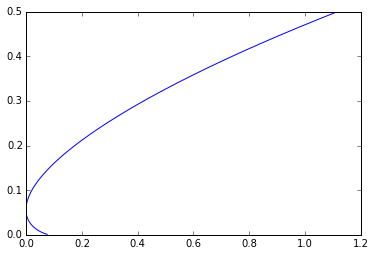

In [26]:
N = 1
rate = 160*N/10000
op_SNR = 1
C = np.log2(1 + 10**(op_SNR/10))
rate = C

deltar = arange(0, 0.5, 10**(-3))
q = Q(np.sqrt(2*10**(op_SNR/10)))
rates = divergence(deltar, q)
# rates[0] = 1
rateToDelta = interp1d(rates, deltar, kind='linear', bounds_error=False, fill_value=(0.0, 0.5))
deltacrit = rateToDelta(rate)

plot(rates, deltar)
print deltacrit
print C
# plot(deltar, rates, lw=2.0)
# p = 0.5
# divergence = p*np.log(p/q) + (1-p) * np.log((1-p)/(1-q)) # ln
# divergence
# e**(-10000/21/arange(1, 36, 1))
# print e**(-10000*divergence)
# print 10000*divergence
print rates